# Question 3

## Outline
* In this question, we examine the accuracy and convergence speed of Monte Carlo integration.
* The methodology of Monte Carlo integration is as follows
  * as simplest case, for a random variable $X$ which distriburtion is a uniform distribution on $[a, b]$ it holds that $\int_a^b f(x) dx = E(f(X)) \approx \frac{1}{N} f(X_i)$, where $X_i$ are sample values of $X$.
  * we can calculate the right hand side as sample mean using random sample value from uniform distribution and we approxiate the target integration by this sample mean.
* We examine this method to three integration:
  1. $\int_1^3 x^2 dx$,
  1. $\int_0^\infty \exp(-x^2) dx$,
  1. $\frac{1}{\sqrt{2\pi}} \int_{-\infty}^\infty x^4 \exp(-x^2/2) dx$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import product

In [2]:
n_rnd_order_max = 8
n_rnd_max = 10**8

## (1) $\int_1^3 x^2 dx$

* In this case, true value = $[\frac{1}{3} x^3]_1^3 = \frac{26}{3}$.

### Implementation (1)

In [3]:
a = 1.0
b = 3.0
f = lambda x: x * x

In [4]:
true_val = (b**3 - a**3) / 3.
true_val

8.666666666666666

In [5]:
rnd = (b - a) * np.random.rand(n_rnd_max) + a
n_sample = np.sort(np.array([k * 10**p for k , p in product(range(1, 10), range(3, n_rnd_order_max))]))
mc = np.array([(b - a) * f(rnd[:n]).mean() for n in n_sample]) 
mc_diff = mc - true_val

### Result (1)

Text(0, 0.5, 'Monte Carlo error')

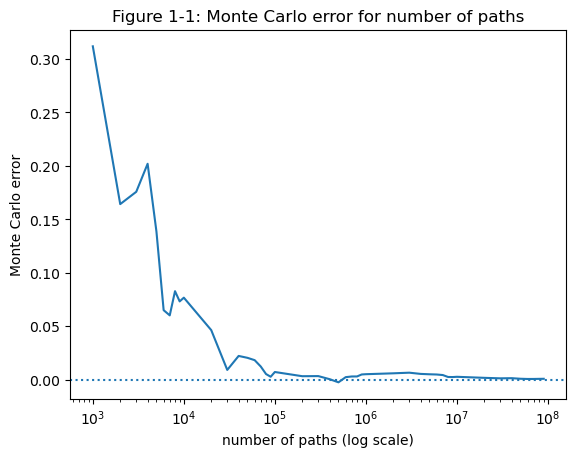

In [6]:
plt.plot(n_sample, mc_diff)
plt.axhline(y=0.0, linestyle='dotted')
plt.xscale('log')
plt.title('Figure 1-1: Monte Carlo error for number of paths')
plt.xlabel('number of paths (log scale)')
plt.ylabel('Monte Carlo error')
plt.show()

Text(0, 0.5, '|Monte Carlo error| (log scale)')

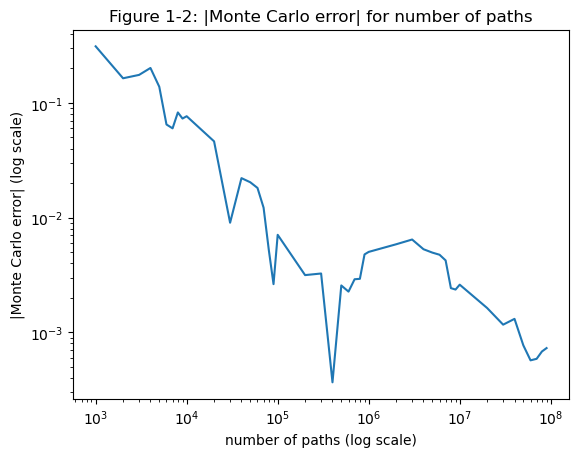

In [7]:
plt.plot(n_sample, np.abs(mc_diff))
plt.axhline(y=0.0, linestyle='dotted')
plt.title('Figure 1-2: |Monte Carlo error| for number of paths')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('number of paths (log scale)')
plt.ylabel('|Monte Carlo error| (log scale)')
plt.show()

### Observation
* Order of Monte Carlo error (= difference between Monte Carlo result and true value) is about number of random numbers^-2.

## (2) $\int_0^\infty \exp(-x^2) dx$


* In this case, we cannot use uniform distribution directly, because the integral interval is not finite.
* We can consider two simplest approach:
  1. Cutoff to finite interval
  1. Variable change to finite interval (ex: $ u = \tan x$)
* The true value is $\pi/2$
* We can consider an idea to use normal random variable by the symmetry of the integral and some scaling. This conversion, however, gives trivial integration, that is, the integrand is converted constant. Hence we obsolete the idea in this case.

In [56]:
f = lambda x: np.exp(-x*x)
true_val_2 = np.sqrt(np.pi) / 2.
true_val_2

0.8862269254527579

### Implementaion (2-1): cutoff (at 100000)

In [9]:
cut_off = 100000.

In [21]:
a = 0.
b = cut_off
rnd = (b - a) * np.random.rand(n_rnd_max) + a
n_sample = np.sort(np.array([k * 10**p for k , p in product(range(1, 10), range(3, n_rnd_order_max))]))
mc_2_1 = np.array([(b - a) * f(rnd[:n]).mean() for n in n_sample])

### Result (2-1)

Text(0, 0.5, 'Monte Carlo error')

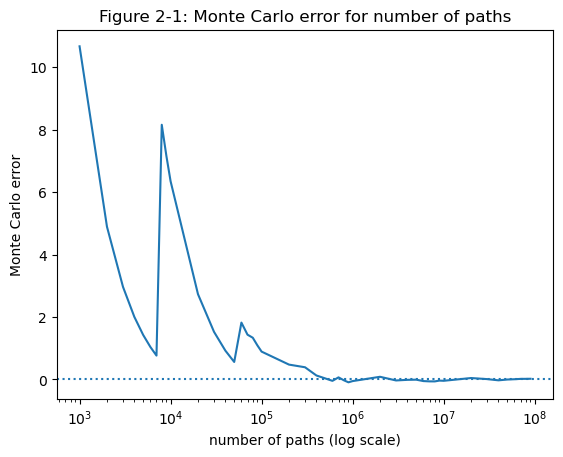

In [22]:
plt.plot(n_sample, mc_2_1 - true_val_2)
plt.axhline(y=0.0, linestyle='dotted')
plt.xscale('log')
plt.title('Figure 2-1: Monte Carlo error for number of paths')
plt.xlabel('number of paths (log scale)')
plt.ylabel('Monte Carlo error')
plt.show()

Text(0, 0.5, '|Monte Carlo error|')

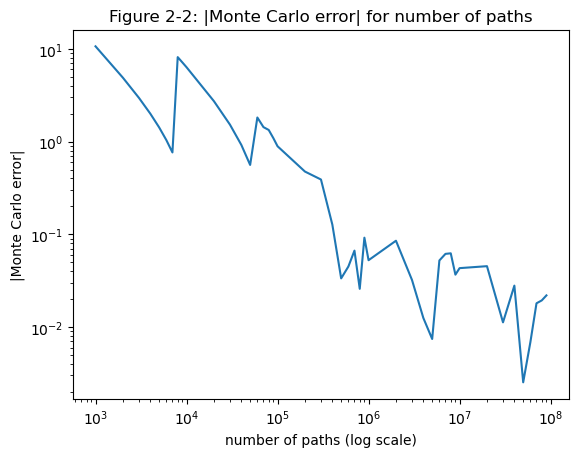

In [23]:
plt.plot(n_sample, abs(mc_2_1 - true_val_2))
plt.xscale('log')
plt.yscale('log')
plt.title('Figure 2-2: |Monte Carlo error| for number of paths')
plt.xlabel('number of paths (log scale)')
plt.ylabel('|Monte Carlo error| (log scale)')
plt.show()

### Implementaion (2-2): cutoff (at 1)

In [44]:
cut_off_2 = 1.

In [45]:
a = 0.
b = cut_off_2
rnd = (b - a) * np.random.rand(n_rnd_max) + a
n_sample = np.sort(np.array([k * 10**p for k , p in product(range(1, 10), range(3, n_rnd_order_max))]))
mc_2_2 = np.array([(b - a) * f(rnd[:n]).mean() for n in n_sample])

### Result (2-2)

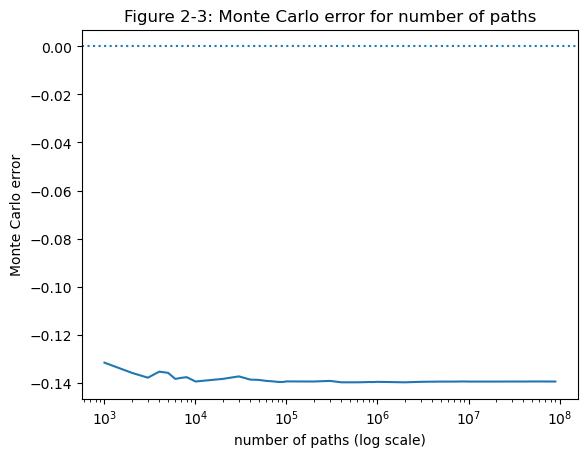

In [48]:
plt.plot(n_sample, mc_2_2 - true_val_2)
plt.axhline(y=0.0, linestyle='dotted')
plt.xscale('log')
plt.title('Figure 2-3: Monte Carlo error for number of paths')
plt.xlabel('number of paths (log scale)')
plt.ylabel('Monte Carlo error')
plt.show()

Text(0, 0.5, '|Monte Carlo error|')

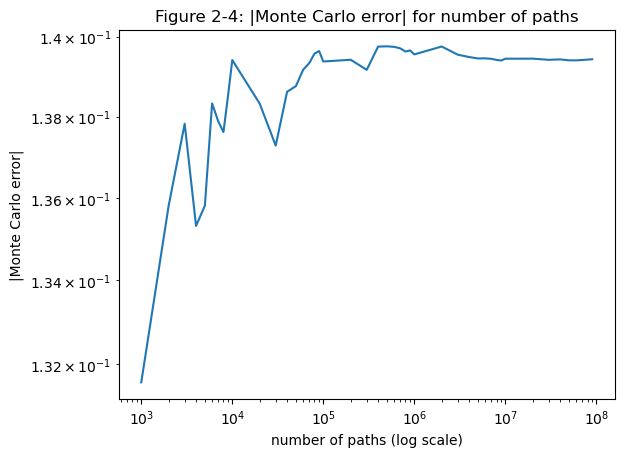

In [47]:
plt.plot(n_sample, abs(mc_2_2 - true_val_2))
plt.xscale('log')
plt.yscale('log')
plt.title('Figure 2-4: |Monte Carlo error| for number of paths')
plt.xlabel('number of paths (log scale)')
plt.ylabel('|Monte Carlo error| (log scale)')
plt.show()

### Implementation (2-3): variable change

* Using the variable change $x = \tan u$, the target integration is rewrite as
$$
  \int_0^\infty \exp(-x^2) dx = \int_0^{\frac{\pi}{2}} \exp(-\tan^2 u) \frac{1}{\cos^2 u} du
$$

In [13]:
f_u = lambda u: f(np.tan(u)) / (np.cos(u)**2)

In [27]:
a = 0.
b = np.pi / 2
rnd = (b - a) * np.random.rand(n_rnd_max) + a
n_sample = np.sort(np.array([k * 10**p for k , p in product(range(1, 10), range(3, n_rnd_order_max))]))
mc_2_3 = np.array([(b - a) * f_u(rnd[:n]).mean() for n in n_sample])

### Result (2-3) 

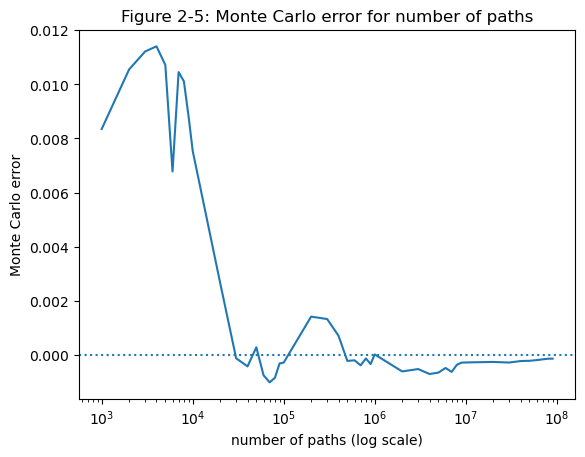

In [57]:
plt.plot(n_sample, mc_2_3 - true_val_2)
plt.axhline(y=0.0, linestyle='dotted')
plt.xscale('log')
plt.title('Figure 2-5: Monte Carlo error for number of paths')
plt.xlabel('number of paths (log scale)')
plt.ylabel('Monte Carlo error (log scale)')
plt.show()

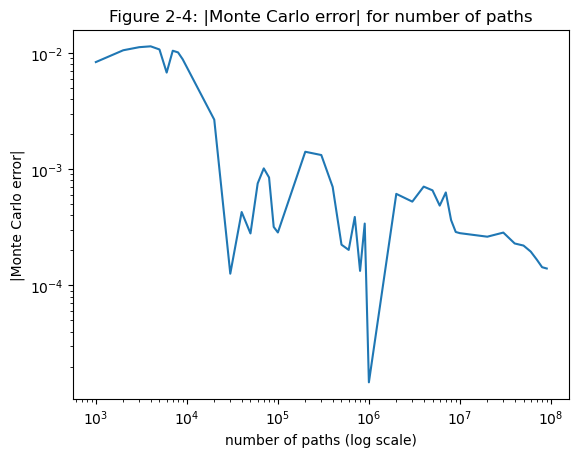

In [58]:
plt.plot(n_sample, np.abs(mc_2_3 - true_val_2))
plt.axhline(y=0.0, linestyle='dotted')
plt.xscale('log')
plt.yscale('log')
plt.title('Figure 2-4: |Monte Carlo error| for number of paths')
plt.xlabel('number of paths (log scale)')
plt.ylabel('|Monte Carlo error| (log scale)')
plt.show()

### Observation
1. for cutoff method with large cutoff value, the result is unstable for the change of random seed. This is because we need to generate much more number of random values to fill the integral interval.
1. If we use small cutoff value then Monte Carlo integration does not converge to true value due to the cutoff error.
1. Variable exchage method needs some calculation cost for more complecated integrand, but the convergence is faster than other method and accurate.
The reasons are that (1) we can fill the integrand interval by randam values faster, and that (2) there is no cutoff error. 

## (3) $\frac{1}{\sqrt{2\pi}} \int_{-\infty}^\infty x^4 \exp(-x^2/2) dx$

* In this case, using standard normal variable $Z$ we can rewrite this to
$$
  \frac{1}{\sqrt{2\pi}} \int_{-\infty}^\infty x^4 \exp(-x^2/2) dx = E(Z^4)
$$
* So we try three method in this integral:
  1. cutoff (both side),
  1. variable exchange,
  1. conversion to normal ramdom variable as above.
* The true value = 3.

In [62]:
true_val_3 = 3.
f = lambda x: x**4 * np.exp(-x*x / 2.)

### Implementation (3-1): cutoff

In [50]:
cut_off = 1000.
a = -cut_off
b = cut_off
rnd = (b - a) * np.random.rand(n_rnd_max) + a
n_sample = np.sort(np.array([k * 10**p for k , p in product(range(1, 10), range(3, n_rnd_order_max))]))
mc_3_1 = np.array([(b - a) * f(rnd[:n]).mean() for n in n_sample]) / (np.sqrt(2 * np.pi))

### Result (3-1) 

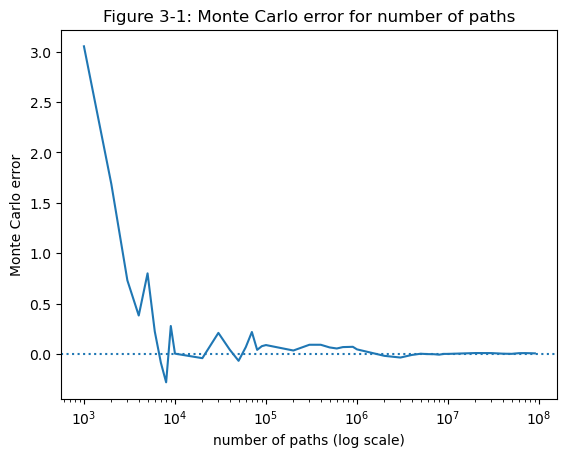

In [54]:
plt.plot(n_sample, mc_3_1 - true_val_3)
plt.axhline(y=0.0, linestyle='dotted')
plt.xscale('log')
plt.title('Figure 3-1: Monte Carlo error for number of paths')
plt.xlabel('number of paths (log scale)')
plt.ylabel('Monte Carlo error')
plt.show()

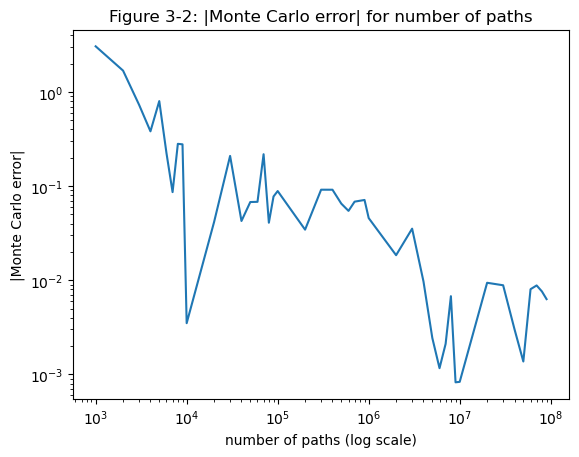

In [59]:
plt.plot(n_sample, abs(mc_3_1 - true_val_3))
plt.xscale('log')
plt.yscale('log')
plt.title('Figure 3-2: |Monte Carlo error| for number of paths')
plt.xlabel('number of paths (log scale)')
plt.ylabel('|Monte Carlo error|')
plt.show()

### Implementation (3-2): variable change

In [63]:
a = - np.pi / 2
b = np.pi / 2
f_u = lambda u: f(np.tan(u)) / (np.cos(u)**2)

rnd = (b - a) * np.random.rand(n_rnd_max) + a
n_sample = np.sort(np.array([k * 10**p for k , p in product(range(1, 10), range(3, n_rnd_order_max))]))
mc_3_2 = np.array([(b - a) * f_u(rnd[:n]).mean() for n in n_sample]) / (np.sqrt(2 * np.pi))

### Result (3-2) 

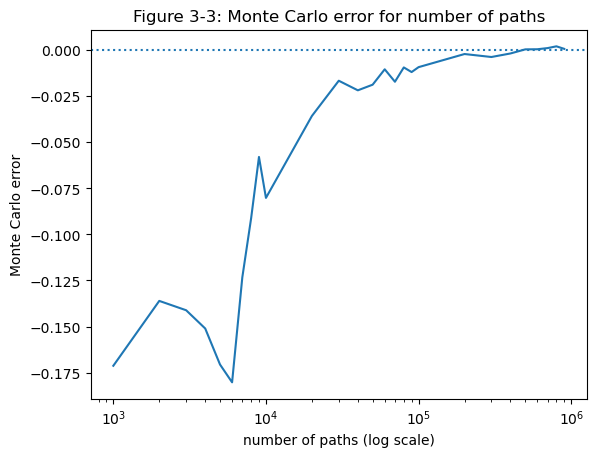

In [64]:
plt.plot(n_sample, mc_3_2 - true_val_3)
plt.axhline(y=0.0, linestyle='dotted')
plt.xscale('log')
plt.title('Figure 3-3: Monte Carlo error for number of paths')
plt.xlabel('number of paths (log scale)')
plt.ylabel('Monte Carlo error')
plt.show()

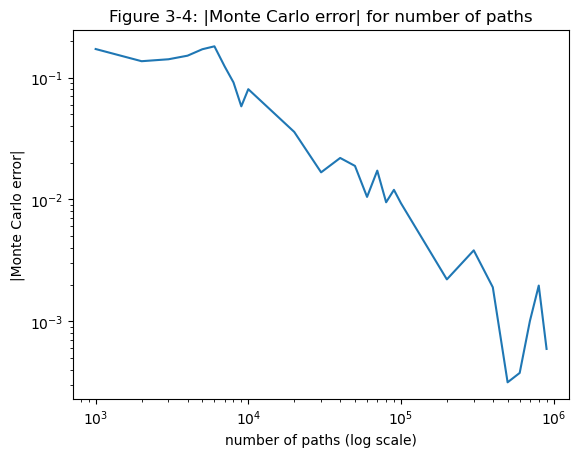

In [65]:
plt.plot(n_sample, abs(mc_3_2 - true_val_3))
plt.xscale('log')
plt.yscale('log')
plt.title('Figure 3-4: |Monte Carlo error| for number of paths')
plt.xlabel('number of paths (log scale)')
plt.ylabel('|Monte Carlo error| (log scale)')
plt.show()

### Implementation (3-3): normal variable

In [69]:
rnd_n = np.random.randn(n_rnd_max)
q = lambda x: x**4

n_sample = np.sort(np.array([k * 10**p for k , p in product(range(1, 10), range(3, n_rnd_order_max))]))
mc_3_3 = np.array([q(rnd_n[:n]).mean() for n in n_sample])

### Result (3-3) 

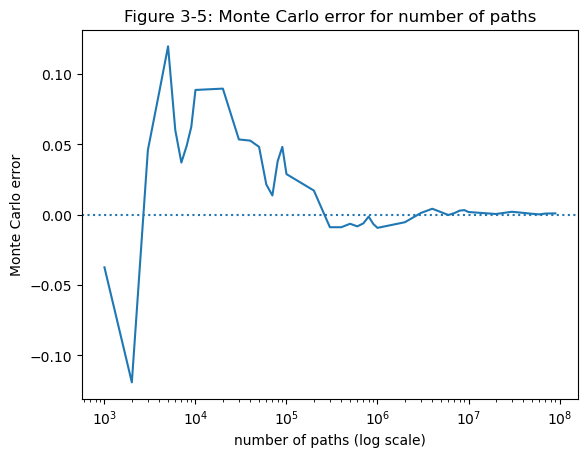

In [70]:
plt.plot(n_sample, mc_3_3 - true_val_3)
plt.axhline(y=0.0, linestyle='dotted')
plt.xscale('log')
plt.title('Figure 3-5: Monte Carlo error for number of paths')
plt.xlabel('number of paths (log scale)')
plt.ylabel('Monte Carlo error')
plt.show()

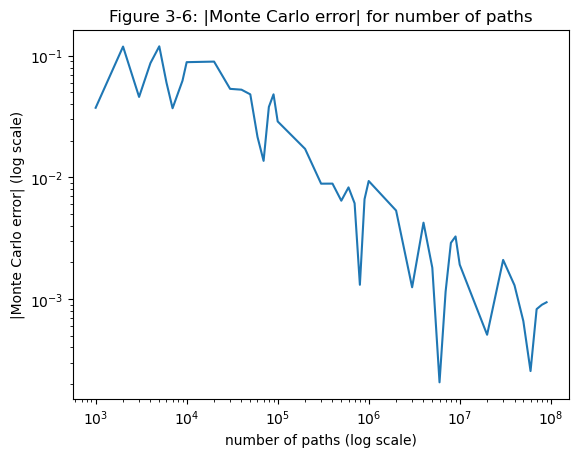

In [71]:
plt.plot(n_sample, abs(mc_3_3 - true_val_3))
plt.xscale('log')
plt.yscale('log')
plt.title('Figure 3-6: |Monte Carlo error| for number of paths')
plt.xlabel('number of paths (log scale)')
plt.ylabel('|Monte Carlo error| (log scale)')
plt.show()

## Conclusion

## Reference